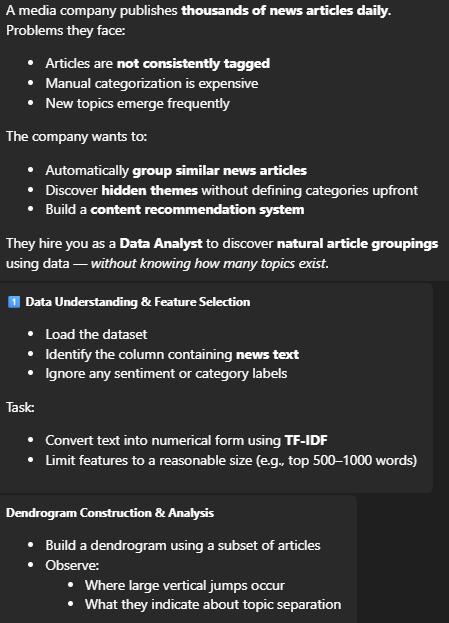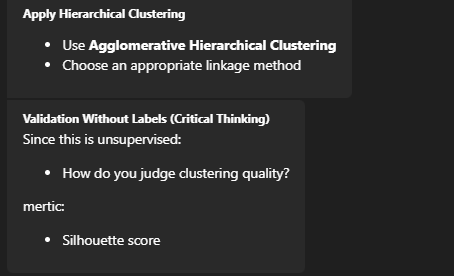

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


In [ ]:

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/all-data.csv"

dataset=pd.read_csv(file_path, encoding='latin1')
dataset.head()
# Use only news text column (second column)
texts = dataset.iloc[:, 1].astype(str)

print("Total Articles:", len(texts))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total Articles: 4845


In [ ]:
# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
X = vectorizer.fit_transform(texts)

print("TF-IDF Shape:", X.shape)


TF-IDF Shape: (4845, 500)


In [ ]:
# Reduce high-dimensional text data for better clustering
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X)

print("Reduced Shape:", X_reduced.shape)


Reduced Shape: (4845, 50)


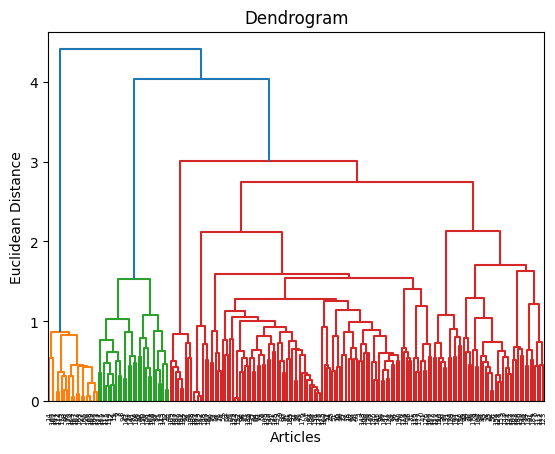

In [ ]:
# Build dendrogram to find optimal number of clusters
subset = X_reduced[:200]   # use subset for speed

dendrogram = sch.dendrogram(sch.linkage(subset, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Articles')
plt.ylabel('Euclidean Distance')
plt.show()


In [ ]:
# Apply Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_reduced)

y_hc[:20]


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
# Evaluate clustering performance
score = silhouette_score(X_reduced, y_hc)
print("Silhouette Score:", score)


Silhouette Score: 0.17705332300292825
